# Evaluation

In [1]:
import os
import cv2
import sys
import numpy as np
from matplotlib import pyplot as plt
from utils import plot_overlay, plot_diff_overlay

In [11]:
TRAIN_PATH = '../data/Munich/2023/raw'
PREDICTED_PATH = '../data/Munich/2023/prediction/samgeo_batches_v6'

train_files = os.listdir(TRAIN_PATH)
train_files = list(filter(lambda x: x.endswith(".tif"), train_files))

### Compare images

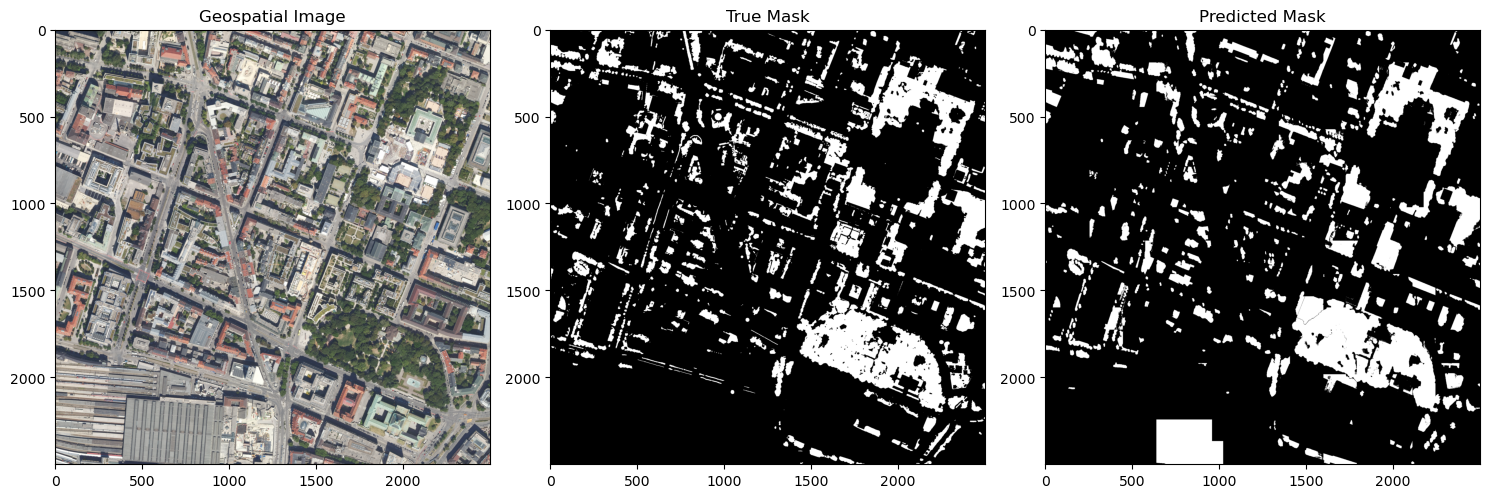

In [3]:
# show one image
file_name = train_files[1]

img_name = file_name.rstrip('.tif')
img_path = os.path.join(TRAIN_PATH, file_name)
mask_path = os.path.join(TRAIN_PATH, img_name + '_label.png')
predicted_path = os.path.join(PREDICTED_PATH, img_name + '_predicted.tif')
# print(img_path, mask_path, predicted_path)

# plot 3 images first actual then label and predicted
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path)
predicted = cv2.imread(predicted_path)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Geospatial Image')
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.title('True Mask')
plt.subplot(1, 3, 3)
plt.imshow(predicted)
plt.title('Predicted Mask')

plt.tight_layout()
plt.show()

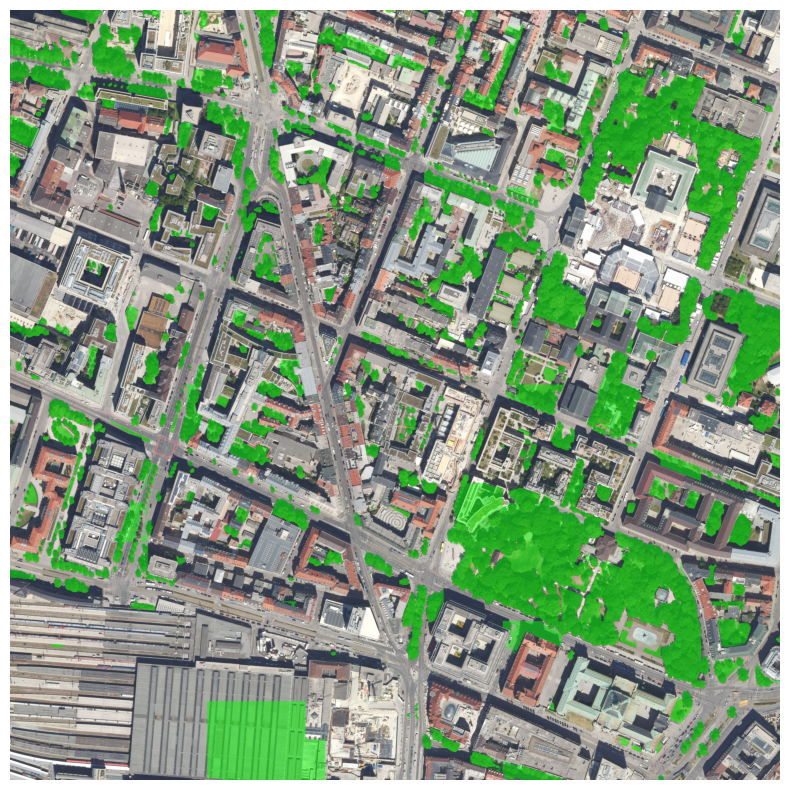

In [4]:
plot_overlay(img_path, predicted_path)

### Generate diff mask

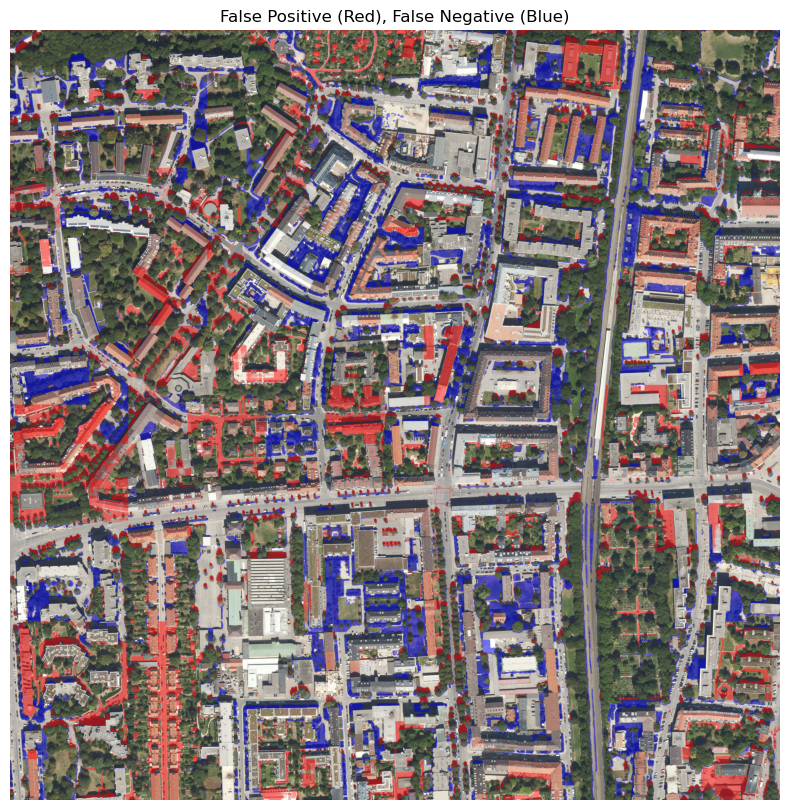

In [5]:
# show one image
file_name = train_files[0]

img_name = file_name.rstrip('.tif')
img_path = os.path.join(TRAIN_PATH, file_name)
mask_path = os.path.join(TRAIN_PATH, img_name + '_label.png')
predicted_path = os.path.join(PREDICTED_PATH, img_name + '_predicted.tif')


plot_diff_overlay(img_path, mask_path, predicted_path, title="False Positive (Red), False Negative (Blue)")

In [6]:
sys.path.append('../mask_evaluation')
from main import print_metrics, evaluate_files, evaluate_file

In [14]:

masks = []

# create list of masks (base_mask, predicted_mask)
for file_name in train_files:
    img_name = file_name.rstrip('.tif')
    img_path = os.path.join(TRAIN_PATH, file_name)
    mask_path = os.path.join(TRAIN_PATH, img_name + '_label.png')
    predicted_path = os.path.join(PREDICTED_PATH, img_name + '_predicted.tif')
    masks.append((predicted_path, mask_path))

evaluation = evaluate_files(masks)

print_metrics(evaluation)

Results: 
   accuracy: 91.685 %
         f1:  0.900
     recall:  0.911 (or sensitivity)
  precision:  0.890
specificity:  0.921
        iou:  0.818 (or Jaccard index)

TPR: 0.911 | FNR: 0.089
TNR: 0.921 | FPR: 0.079
PPV: 0.890 | FDR: 0.110
NPV: 0.937 | FOR: 0.063


### Create overview table

In [13]:
masks = []

for file_name in sorted(train_files):
    img_name = file_name.rstrip('.tif')
    img_path = os.path.join(TRAIN_PATH, file_name)
    mask_path = os.path.join(TRAIN_PATH, img_name + '_label.png')
    predicted_path = os.path.join(PREDICTED_PATH, img_name + '_predicted.tif')
    masks.append((predicted_path, mask_path))
    e = evaluate_file(mask_path, predicted_path)
    print(f"{img_name} & {e.iou:.3f} & {e.F1:.3f} & {e.accuracy*100:.3f}\% & {e.precision:.3f} & {e.recall:.3f} & {e.TPR:.3f} & {e.TNR:.3f} & {e.FPR:.3f} & {e.FNR:.3f}\\\\")
    
e = evaluate_files(masks)
print(f"Overall & {e.iou:.3f} & {e.F1:.3f} & {e.accuracy*100:.3f}\% & {e.precision:.3f} & {e.recall:.3f} & {e.TPR:.3f} & {e.TNR:.3f} & {e.FPR:.3f} & {e.FNR:.3f}\\\\")
    

32688_5332 & 0.664 & 0.798 & 83.489\% & 0.826 & 0.772 & 0.772 & 0.881 & 0.119 & 0.228\\
32690_5335 & 0.667 & 0.800 & 93.067\% & 0.836 & 0.768 & 0.768 & 0.967 & 0.033 & 0.232\\
32691_5334 & 0.589 & 0.741 & 94.518\% & 0.796 & 0.693 & 0.693 & 0.977 & 0.023 & 0.307\\
32692_5335 & 0.773 & 0.872 & 89.328\% & 0.854 & 0.890 & 0.890 & 0.895 & 0.105 & 0.110\\
32692_5347 & 0.980 & 0.990 & 98.023\% & 0.995 & 0.985 & 0.985 & 0.727 & 0.273 & 0.015\\
Overall & 0.818 & 0.900 & 91.685\% & 0.890 & 0.911 & 0.911 & 0.921 & 0.079 & 0.089\\
